In [463]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np

filepath = Path("Resources/Cleaned_Genre_Studio_Data.csv")
filepath2 = Path("Resources/MainDataWdatetime_minusNAN.csv")

clean_studio = pd.read_csv(filepath, encoding="utf-8")
data_with_time = pd.read_csv(filepath2, encoding="utf-8")

clean_studio.head()

,Unnamed: 0,uid,Name,genre,episodes,members,popularity,ranked,score,Type,Studio,Start Date,End Date
0,0,28891,Haikyuu!! Second Season,Comedy,25.0,489888,141,25.0,8.82,TV,Production I.G,"Oct 4, 2015","Mar 27, 2016"
1,1,23273,Shigatsu wa Kimi no Uso,Drama,22.0,995473,28,24.0,8.83,TV,A-1 Pictures,"Oct 10, 2014","Mar 20, 2015"
2,2,34599,Made in Abyss,Sci-Fi,13.0,581663,98,23.0,8.83,TV,Kinema Citrus,"Jul 7, 2017","Sep 29, 2017"
3,3,5114,Fullmetal Alchemist: Brotherhood,Action,64.0,1615084,4,1.0,9.23,TV,Bones,"Apr 5, 2009","Jul 4, 2010"
4,4,31758,Kizumonogatari III: Reiketsu-hen,Action,1.0,214621,502,22.0,8.83,Movie,Shaft,"Jan 6, 2017",NaN


In [464]:
clean_studio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18939 entries, 0 to 18938
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  18939 non-null  int64  
 1   uid         18939 non-null  int64  
 2   Name        18939 non-null  object 
 3   genre       18860 non-null  object 
 4   episodes    18411 non-null  float64
 5   members     18939 non-null  int64  
 6   popularity  18939 non-null  int64  
 7   ranked      15963 non-null  float64
 8   score       18596 non-null  float64
 9   Type        2815 non-null   object 
 10  Studio      2815 non-null   object 
 11  Start Date  18939 non-null  object 
 12  End Date    9696 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 1.9+ MB


In [465]:
data_with_time.head()

,Unnamed: 0,uid,Name,episodes,members,popularity,ranked,score,Type,Studio,Start Date,End Date,Genre
0,0,28891,Haikyuu!! Second Season,25.0,489888,141,25.0,8.82,TV,['Production I.G'],2015-10-04,"Mar 27, 2016",Comedy
1,1,23273,Shigatsu wa Kimi no Uso,22.0,995473,28,24.0,8.83,TV,['A-1 Pictures'],2014-10-10,"Mar 20, 2015",Drama
2,2,34599,Made in Abyss,13.0,581663,98,23.0,8.83,TV,['Kinema Citrus'],2017-07-07,"Sep 29, 2017",SciFi
3,3,5114,Fullmetal Alchemist: Brotherhood,64.0,1615084,4,1.0,9.23,TV,['Bones'],2009-04-05,"Jul 4, 2010",Action
4,4,31758,Kizumonogatari III: Reiketsu-hen,1.0,214621,502,22.0,8.83,Movie,['Shaft'],2017-01-06,NaN,Action


In [466]:
arr = clean_studio["genre"].unique()
print(arr)

['Comedy' 'Drama' 'Sci-Fi' 'Action' 'Adventure' 'Mystery' 'Slice of Life'
 'Fantasy' 'Romance' 'Ecchi' 'Military' 'School' 'Magic' 'Cars' 'Music'
 'Horror' 'Historical' 'Game' 'Sports' 'Psychological' 'Kids' 'Dementia'
 'Josei' 'Harem' 'Space' nan 'Thriller' 'Demons' 'Supernatural' 'Mecha'
 'Parody' 'Super Power' 'Shounen' 'Hentai' 'Yaoi' 'Shounen Ai' 'Police'
 'Martial Arts' 'Shoujo' 'Seinen' 'Samurai' 'Vampire']


In [467]:
genrelist = pd.DataFrame(clean_studio, columns = ['genre'])
print (genrelist)

           genre
0         Comedy
1          Drama
2         Sci-Fi
3         Action
4         Action
...          ...
18934     Sci-Fi
18935  Adventure
18936    Mystery
18937     Action
18938   Military

[18939 rows x 1 columns]


In [468]:
genrelist2 = genrelist.groupby('genre').mean()
print (genrelist2)

Empty DataFrame
Columns: []
Index: [Action, Adventure, Cars, Comedy, Dementia, Demons, Drama, Ecchi, Fantasy, Game, Harem, Hentai, Historical, Horror, Josei, Kids, Magic, Martial Arts, Mecha, Military, Music, Mystery, Parody, Police, Psychological, Romance, Samurai, School, Sci-Fi, Seinen, Shoujo, Shounen, Shounen Ai, Slice of Life, Space, Sports, Super Power, Supernatural, Thriller, Vampire, Yaoi]


In [469]:
score_avg = clean_studio[['score']].mean()
print(score_avg)

score    6.439526
dtype: float64


In [470]:
score_genre = pd.DataFrame(clean_studio, columns = ['genre', 'score'])
print(score_genre)

           genre  score
0         Comedy   8.82
1          Drama   8.83
2         Sci-Fi   8.83
3         Action   9.23
4         Action   8.83
...          ...    ...
18934     Sci-Fi   7.73
18935  Adventure   7.73
18936    Mystery   7.73
18937     Action   7.73
18938   Military   7.73

[18939 rows x 2 columns]


In [471]:
scorebygenre = score_genre.groupby('genre').mean()
print(scorebygenre)

                  score
genre                  
Action         6.842877
Adventure      6.657473
Cars           5.772833
Comedy         6.474124
Dementia       4.993492
Demons         6.147564
Drama          6.785626
Ecchi          6.348472
Fantasy        6.268569
Game           6.470000
Harem          6.836452
Hentai         6.201743
Historical     6.248430
Horror         5.906842
Josei          7.516000
Kids           5.876797
Magic          6.275893
Martial Arts   6.487143
Mecha          6.157625
Military       6.876168
Music          5.725335
Mystery        7.224359
Parody         6.037692
Police         6.333571
Psychological  6.361111
Romance        6.511090
Samurai        5.521111
School         6.438269
Sci-Fi         6.455072
Seinen         6.345455
Shoujo         5.893750
Shounen        6.511429
Shounen Ai     6.110000
Slice of Life  6.659290
Space          5.965833
Sports         6.476272
Super Power    6.122727
Supernatural   6.003929
Thriller       7.525000
Vampire        3

In [472]:
scorebygenre2 = scorebygenre.sort_values(by='score', ascending = False).head(10)
print(scorebygenre2)

                  score
genre                  
Thriller       7.525000
Josei          7.516000
Mystery        7.224359
Military       6.876168
Action         6.842877
Harem          6.836452
Drama          6.785626
Slice of Life  6.659290
Adventure      6.657473
Shounen        6.511429


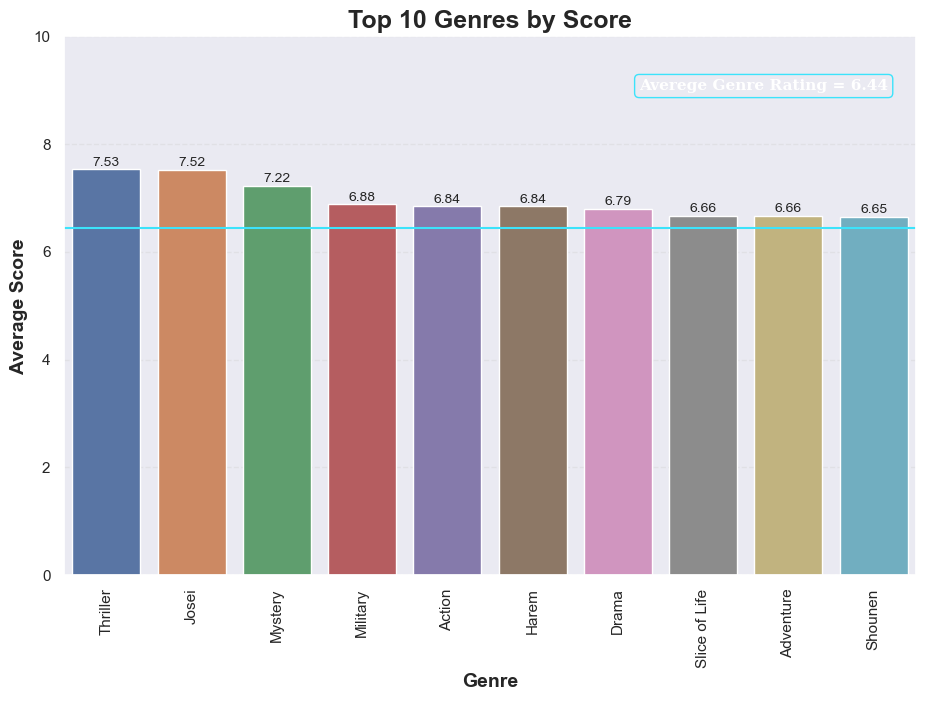

In [473]:
# Creating our own dataframe
data = {'Genre' : ['Thriller', 'Josei', 'Mystery', 'Military', 'Action',
        'Harem', 'Drama', 'Slice of Life', 'Adventure', 'Shounen'],
       'Score' : [7.53, 7.52, 7.22, 6.88, 6.84, 6.84, 6.79, 6.66, 6.66, 6.65]}
 
# Now convert this dictionary type data into a pandas dataframe
# specifying what are the column names
df = pd.DataFrame(data, columns=['Genre', 'Score'])
 
 
# Defining the plot size
plt.figure(figsize=(11, 7))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="Genre", y="Score", data=df)
plt.ylim(0, 10)

plt.title("Top 10 Genres by Score", fontsize=18, fontweight="bold")
plt.xlabel("Genre", fontsize=14, fontweight="bold")
plt.ylabel("Average Score", fontsize=14, fontweight="bold")
plt.xticks(rotation="vertical")
plt.axhline(y=6.44, color='#3ce3fb', linestyle='-')
plt.grid(axis="y", c="lightgray", linestyle="dashed", alpha=0.4)

# Iterating over the bars one-by-one
for bar in plots.patches:
 
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
font = {'family': 'serif',
        'color':  'white',
        'weight': 'bold',
        'size': 11
        }

box = {'facecolor': 'none',
       'edgecolor': '#3ce3fb',
       'boxstyle': 'round'
      }
plt.text(6.25, 9, 'Averege Genre Rating = 6.44', fontdict=font, bbox=box)

# Setting the title for the graph
plt.title("Top 10 Genres by Score", fontsize=18, fontweight="bold")
 
# Finally showing the plot
plt.show()

In [474]:
scorebygenre.head(10)

,score
genre,
Action,6.842877
Adventure,6.657473
Cars,5.772833
Comedy,6.474124
Dementia,4.993492
Demons,6.147564
Drama,6.785626
Ecchi,6.348472
Fantasy,6.268569


In [475]:
#x_axis = np.arange(len(clean_studio))
#tick_locations = [value+0.4 for value in x_axis]

In [476]:
clean_studio.sort_values(by='score', ascending = False)

,Unnamed: 0,uid,Name,genre,episodes,members,popularity,ranked,score,Type,Studio,Start Date,End Date
3,3,5114,Fullmetal Alchemist: Brotherhood,Action,64.0,1615084,4,1.0,9.23,TV,Bones,"Apr 5, 2009","Jul 4, 2010"
2980,3080,5114,Fullmetal Alchemist: Brotherhood,Action,64.0,1615084,4,1.0,9.23,TV,Bones,"Apr 5, 2009","Jul 4, 2010"
17909,18280,11061,Hunter x Hunter (2011),Action,148.0,1052761,20,3.0,9.11,TV,Madhouse,"Oct 2, 2011","Sep 24, 2014"
770,772,11061,Hunter x Hunter (2011),Action,148.0,1052761,20,3.0,9.11,TV,Madhouse,"Oct 2, 2011","Sep 24, 2014"
771,773,9253,Steins;Gate,Thriller,24.0,1331710,7,2.0,9.11,TV,White Fox,"Apr 6, 2011","Sep 14, 2011"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14696,15058,40716,Kakushigoto (TV),Slice of Life,NaN,3275,7504,NaN,NaN,TV,Ajia-Do,"Apr, 2020",?
14698,15061,39049,Jashin-chan Dropkick',Comedy,NaN,7230,5022,NaN,NaN,ONA,Nomad,"Apr, 2020",?
14699,15063,38536,Hitori no Shita: The Outcast 3rd Season,Action,NaN,6577,5161,NaN,NaN,NaN,NaN,2019,?
14708,15075,38086,Fate/Grand Order: Shinsei Entaku Ryouiki Camel...,Action,1.0,14309,3771,NaN,NaN,Movie,Production I.G,2020,?


In [477]:
plt.style.use("dark_background")

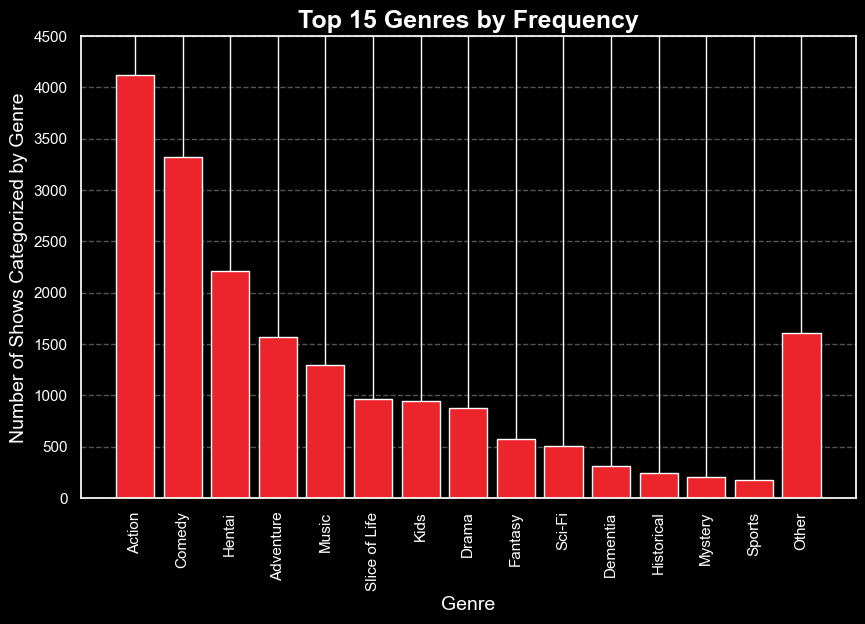

In [478]:
num_shows = [4120, 3321, 2212, 1567, 1296, 963, 948, 876, 573, 504, 317, 247, 209, 177, 1605]
genre = ["Action", "Comedy", "Hentai", "Adventure", "Music", "Slice of Life", "Kids", "Drama", "Fantasy", "Sci-Fi",
         "Dementia", "Historical", "Mystery", "Sports", "Other"]

# init the plot
plt.figure(figsize=(10,6))
plt.bar(genre, num_shows, color='#ec242c', align="center")

# customize the plot
#plt.xlim(-0.75, 4.75)
plt.ylim(0, 4500)

plt.title("Top 15 Genres by Frequency", fontsize=18, fontweight="bold")
plt.xlabel("Genre", fontsize=14)
plt.ylabel("Number of Shows Categorized by Genre", fontsize=14)
plt.xticks(rotation="vertical")

plt.grid(axis="y", c="lightgray", linestyle="dashed", alpha=0.4)

# show the plot
plt.show()

In [479]:
clean_studio.head()

,Unnamed: 0,uid,Name,genre,episodes,members,popularity,ranked,score,Type,Studio,Start Date,End Date
0,0,28891,Haikyuu!! Second Season,Comedy,25.0,489888,141,25.0,8.82,TV,Production I.G,"Oct 4, 2015","Mar 27, 2016"
1,1,23273,Shigatsu wa Kimi no Uso,Drama,22.0,995473,28,24.0,8.83,TV,A-1 Pictures,"Oct 10, 2014","Mar 20, 2015"
2,2,34599,Made in Abyss,Sci-Fi,13.0,581663,98,23.0,8.83,TV,Kinema Citrus,"Jul 7, 2017","Sep 29, 2017"
3,3,5114,Fullmetal Alchemist: Brotherhood,Action,64.0,1615084,4,1.0,9.23,TV,Bones,"Apr 5, 2009","Jul 4, 2010"
4,4,31758,Kizumonogatari III: Reiketsu-hen,Action,1.0,214621,502,22.0,8.83,Movie,Shaft,"Jan 6, 2017",NaN


In [480]:
clean_studio2 = clean_studio.loc[clean_studio.genre.isin(['Ation', 'Comedy', 'Hentai', 'Adventure', 'Music', 'Slice of Life',
                                                         'Kids', 'Drama', 'Fantasy', 'Sci-Fi'])]

In [481]:
genre_data = clean_studio2.genre.value_counts()
print(genre_data)

Comedy           3325
Hentai           2212
Adventure        1567
Music            1296
Slice of Life     963
Kids              948
Drama             876
Fantasy           573
Sci-Fi            504
Name: genre, dtype: int64


In [482]:
genre

['Action',
 'Comedy',
 'Hentai',
 'Adventure',
 'Music',
 'Slice of Life',
 'Kids',
 'Drama',
 'Fantasy',
 'Sci-Fi',
 'Dementia',
 'Historical',
 'Mystery',
 'Sports',
 'Other']

In [483]:
plt.style.use("dark_background")

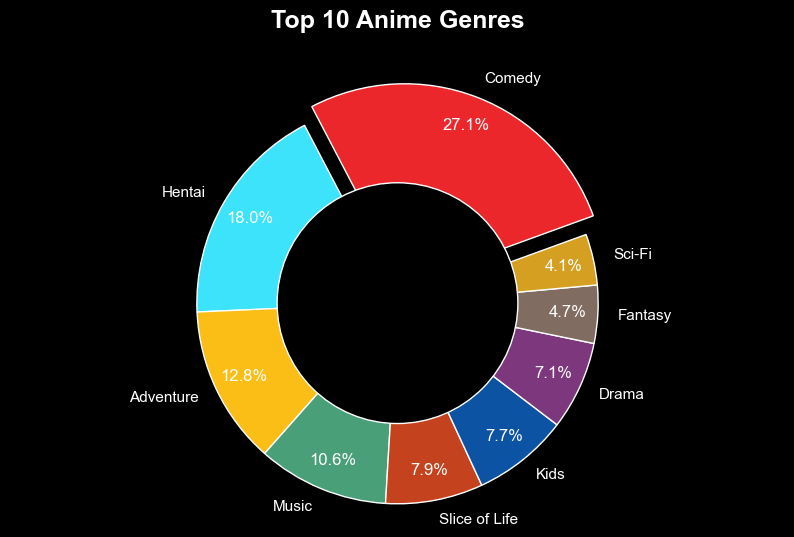

In [484]:
genre_name = genre_data.index
explode = [0 for x in genre_name]
explode[0] = 0.1 

plt.figure(figsize=(10,6))
colors= '#ec272c','#3ce3fb', '#fabe16', '#49A078', '#C4431E', '#0c54a3', '#7D387D','#816C61','#D5A021', '#A8C256'

plt.pie(genre_data, labels=genre_name,explode=explode,
        autopct="%1.1f%%", pctdistance=0.85, shadow=False, startangle=20, colors=colors)

# draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='black')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title("Top 10 Anime Genres\n", fontweight="bold", fontsize=18)
plt.axis("equal")

plt.show()

In [494]:
clean_studio3 = clean_studio.loc[clean_studio.genre.isin(['Ation', 'Comedy', 'Hentai', 'Adventure', 'Music', 'Slice of Life',
                                                         'Kids', 'Drama', 'Fantasy', 'Sci-Fi'])]

In [495]:
clean_studio4 = clean_studio.loc[clean_studio.genre.isin(['Thriller', 'Josei', 'Action', 'Comedy'])]

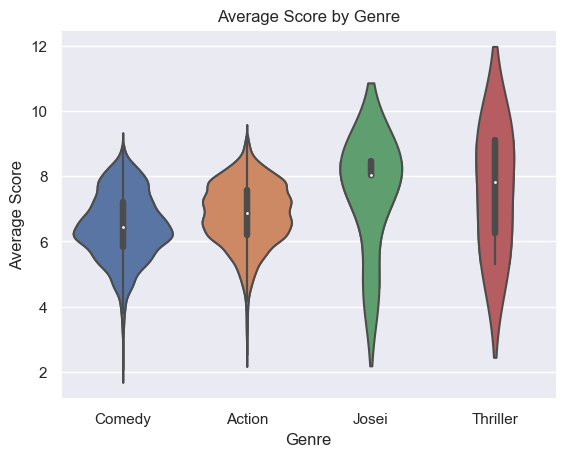

In [497]:
sns.violinplot(data=clean_studio4, x="genre", y="score", cut=0)
ax = sns.violinplot(data=clean_studio4, x='genre', y='score')
sns.set(style="darkgrid")
ax.set(
    title='Average Score by Genre', 
    xlabel='Genre', 
    ylabel='Average Score'
    )
plt.show()

In [490]:
df = sns.scorebygenre2("score")
sns.violinplot(x=df["genre"])

AttributeError: module 'seaborn' has no attribute 'scorebygenre2'